# <center> Machine Learning Assignment #2 </center>

This ipython notebook is work of **Adheesh Trivedi**.

### Loading and plotting the dataset

In [2]:
import numpy as np

data = np.loadtxt('data.csv', delimiter=',', skiprows=1)

In [3]:
# Constants to be used throughout the notebook

N = data.shape[0]
K = 3

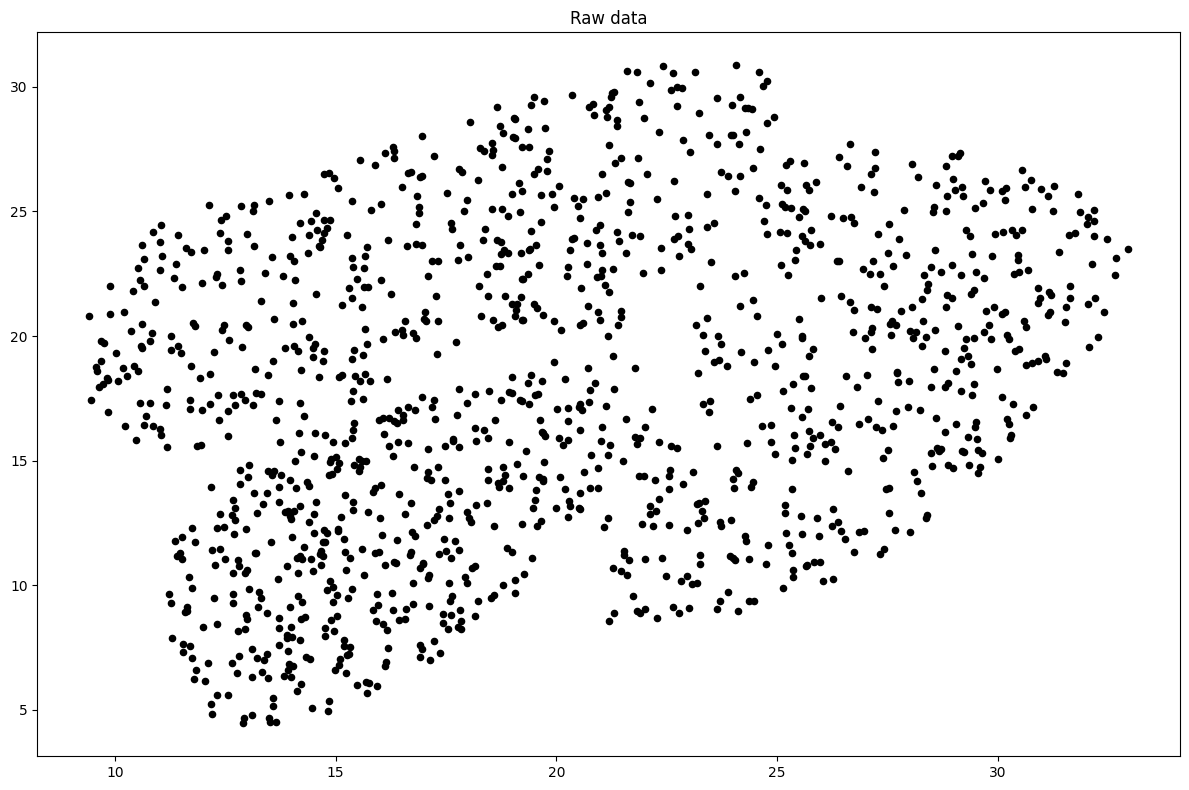

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = 'k')
plt.title('Raw data')
plt.tight_layout()
plt.show()

## Trying out different clustering techniques

### Measuring performance

#### Silhouette Score

Measures how similar a point is to its own cluster compared to other clusters.
Range: $[-1, 1]$

- Values closer to one indicates well-clustered.
- Negative values: Points are likely misclassified.

$$
S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

#### Davies-Bouldin Index

Measures the average ratio of intra-cluster distance to inter-cluster separation.
Lower values indicate better clustering.

$$
    DB = \frac{1}{k} \Sigma_{i=1}^k \max_{i\neq j} \frac{s_i + s_j}{d_{ij}}
$$
​
$s_i$ : Average distance of points in cluster $i$ to their centroid.

$d_{ij}$ : Distance between centroids of clusters $i$ and $j$.

In [5]:
from sklearn.base import ClusterMixin, BaseEstimator
from sklearn.metrics import silhouette_score, davies_bouldin_score

def apply_model(
    model : ClusterMixin or BaseEstimator, points : np.ndarray[int], title : str
    ):
    """
    This function applies the clustering model passed
    and plots the clusters. If the model predicts -1 then
    the data point is considered as noise.
    """

    clusters = model.fit_predict(points)

    silhouette = silhouette_score(points, clusters)
    davies_bouldin = davies_bouldin_score(points, clusters)

    print(f'Silhouette Score: {silhouette:.3f}')
    print(f'Davies-Bouldin Score: {davies_bouldin:.3f}')

    plt.figure(figsize=(10,6))
    plt.title(title)

    plt.scatter(points[clusters != -1, 0], points[clusters != -1, 1], s = 20, c = clusters[clusters != -1], cmap = 'cividis')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\adhtr\scoop\apps\python39\current\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\adhtr\scoop\apps\python39\current\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\adhtr\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\adhtr\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 1043, in launc

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\adhtr\scoop\apps\python39\current\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\adhtr\scoop\apps\python39\current\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\adhtr\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\adhtr\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 1043, in launc

AttributeError: _ARRAY_API not found

### K-Means Clustering

Silhouette Score: 0.421
Davies-Bouldin Score: 0.831


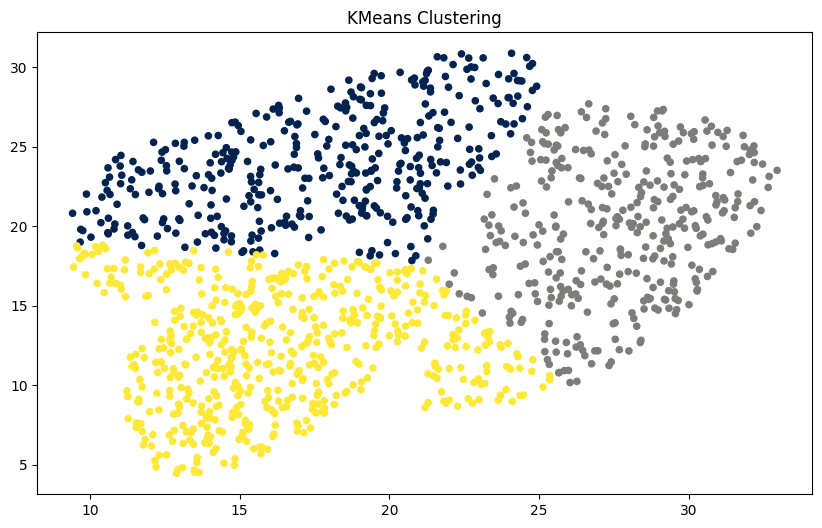

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(3, algorithm = 'lloyd')

apply_model(kmeans, data, 'KMeans Clustering')

### Agglomerative clustering

Silhouette Score: 0.261
Davies-Bouldin Score: 1.349


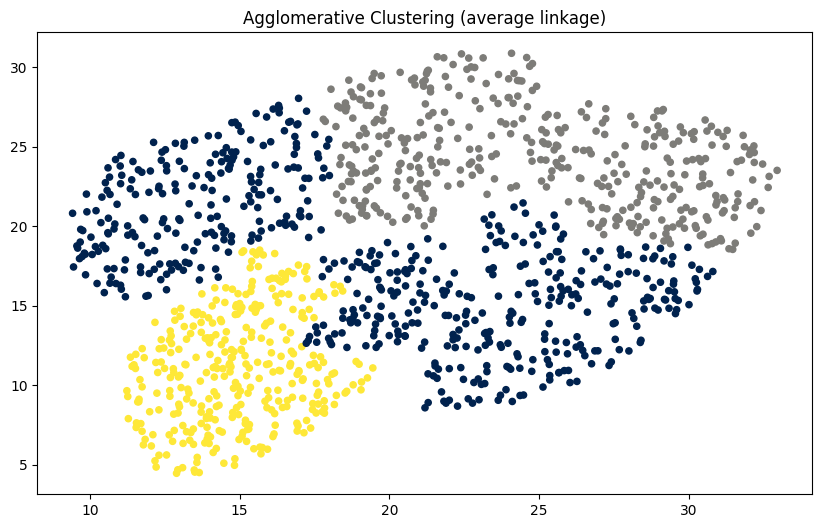

In [7]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(3, linkage='complete')

apply_model(agg, data, 'Agglomerative Clustering (average linkage)')

Silhouette Score: -0.322
Davies-Bouldin Score: 2.081


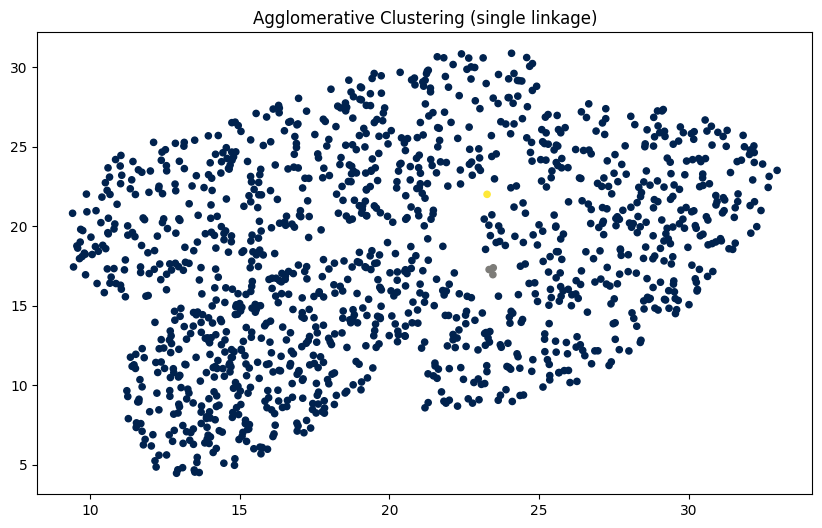

In [8]:
agg = AgglomerativeClustering(3, linkage='single')

apply_model(agg, data, 'Agglomerative Clustering (single linkage)')

Silhouette Score: 0.387
Davies-Bouldin Score: 0.894


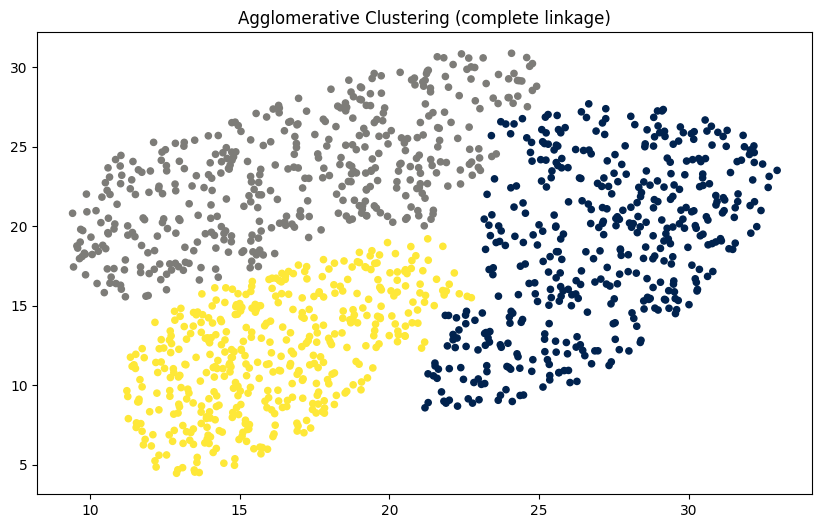

In [9]:
agg = AgglomerativeClustering(3, linkage='average')

apply_model(agg, data, 'Agglomerative Clustering (complete linkage)')

### Bisecting Clustering

Silhouette Score: 0.333
Davies-Bouldin Score: 0.946


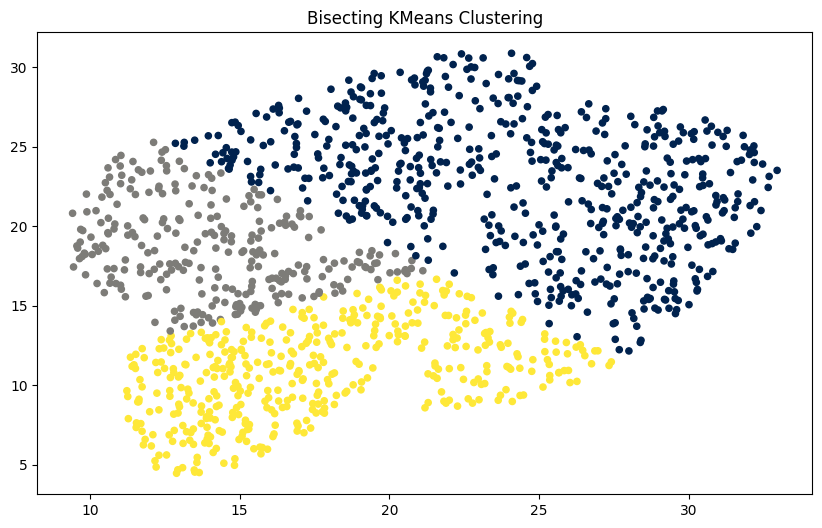

In [10]:
from sklearn.cluster import BisectingKMeans

bkmeans = BisectingKMeans(3, bisecting_strategy='largest_cluster')

apply_model(bkmeans, data, 'Bisecting KMeans Clustering')

### Trying out different feature engineering

From the scores obtained and the visual representation of the clusters, it's obvious that we can eliminate Single and Complete linkage agglomerative clustering methods, and shall proceed with testing on average Agglomerative, Bisecting and K-Means clustering only.

#### Simple PCA

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

data_fe = PCA(n_components=2).fit_transform(data)

Silhouette Score: 0.414
Davies-Bouldin Score: 0.844


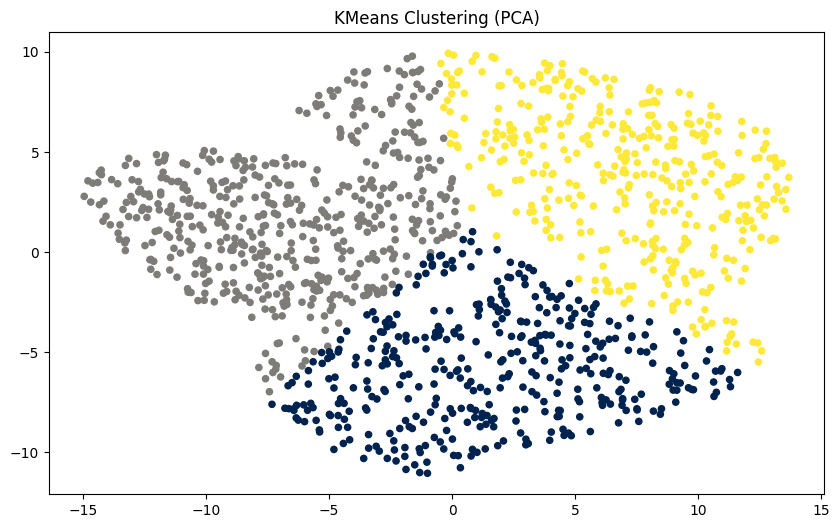

In [12]:
apply_model(kmeans, data_fe, 'KMeans Clustering (PCA)')

Silhouette Score: 0.387
Davies-Bouldin Score: 0.894


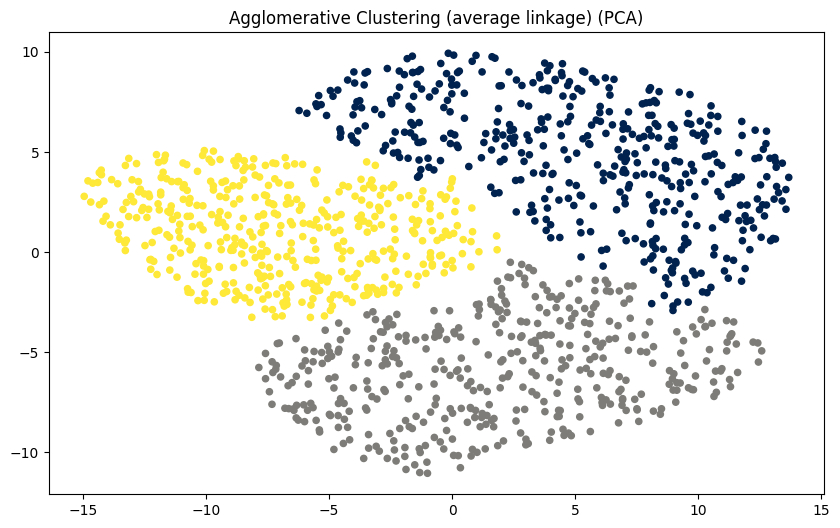

In [14]:
apply_model(agg, data_fe, 'Agglomerative Clustering (average linkage) (PCA)')

Silhouette Score: 0.333
Davies-Bouldin Score: 0.946


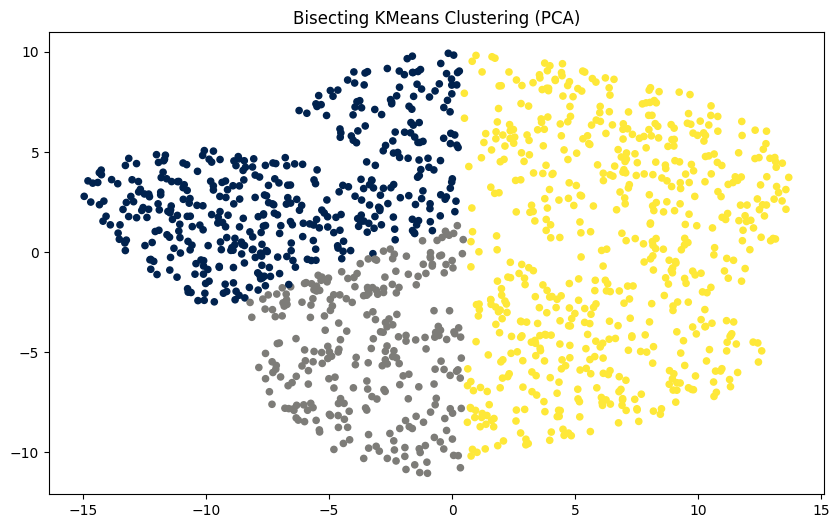

In [15]:
apply_model(bkmeans, data_fe, 'Bisecting KMeans Clustering (PCA)')

#### Standard scaling

In [16]:
data_fe = StandardScaler().fit_transform(data)

Silhouette Score: 0.414
Davies-Bouldin Score: 0.844


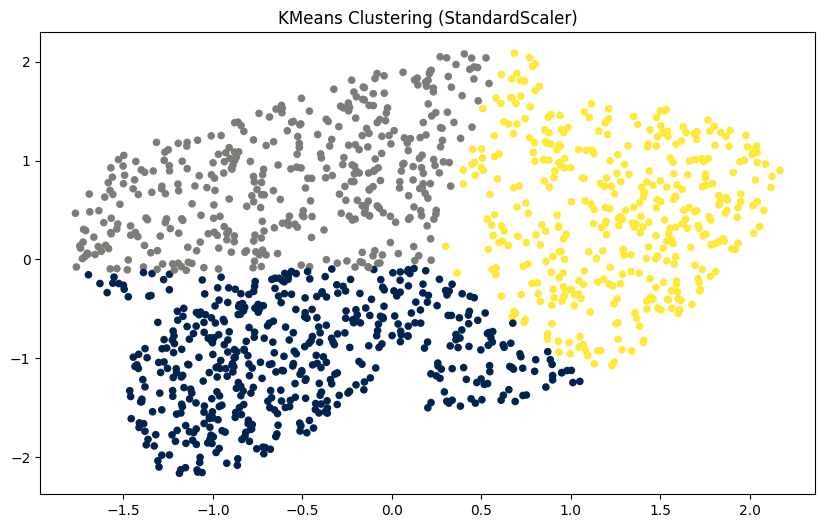

In [17]:
apply_model(kmeans, data_fe, 'KMeans Clustering (StandardScaler)')

Silhouette Score: 0.402
Davies-Bouldin Score: 0.865


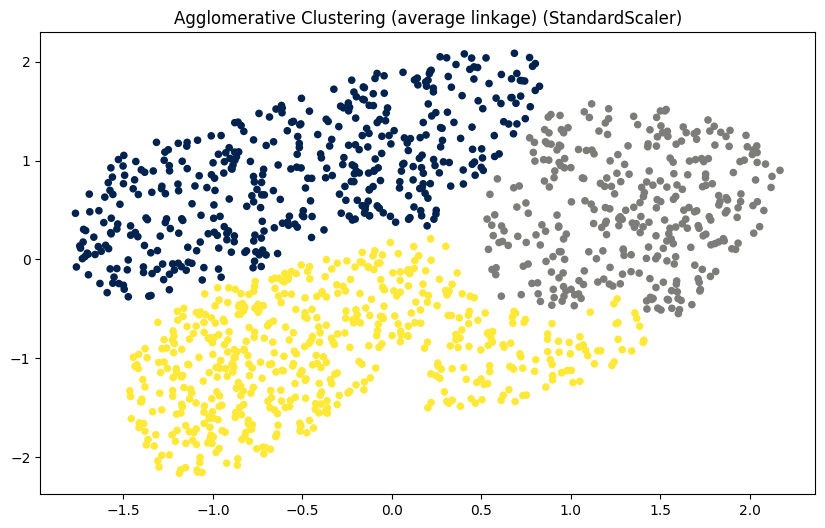

In [18]:
apply_model(agg, data_fe, 'Agglomerative Clustering (average linkage) (StandardScaler)')

Silhouette Score: 0.351
Davies-Bouldin Score: 0.861


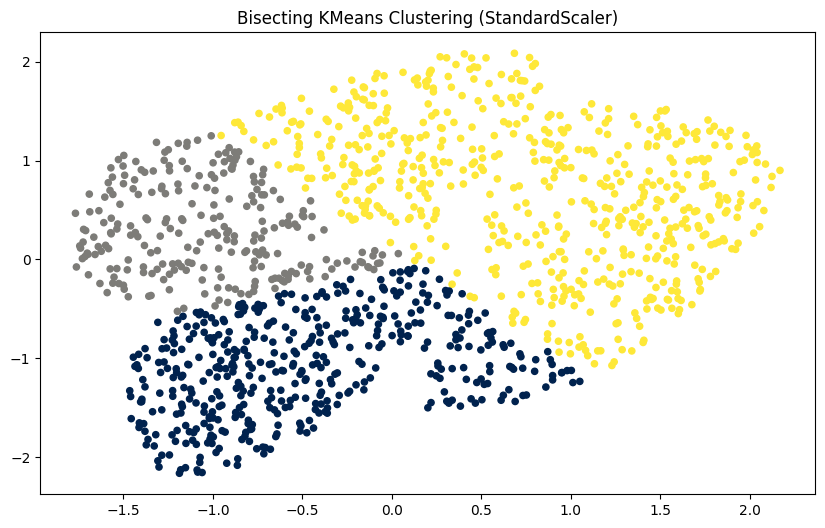

In [19]:
apply_model(bkmeans, data_fe, 'Bisecting KMeans Clustering (StandardScaler)')

#### Min max scaling

In [20]:
data_fe = MinMaxScaler().fit_transform(data)

Silhouette Score: 0.416
Davies-Bouldin Score: 0.842


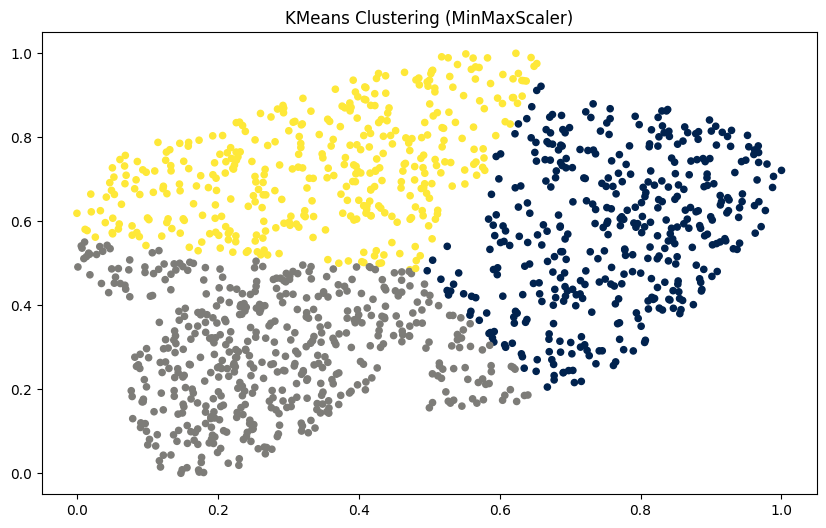

In [21]:
apply_model(kmeans, data_fe, 'KMeans Clustering (MinMaxScaler)')

Silhouette Score: 0.408
Davies-Bouldin Score: 0.872


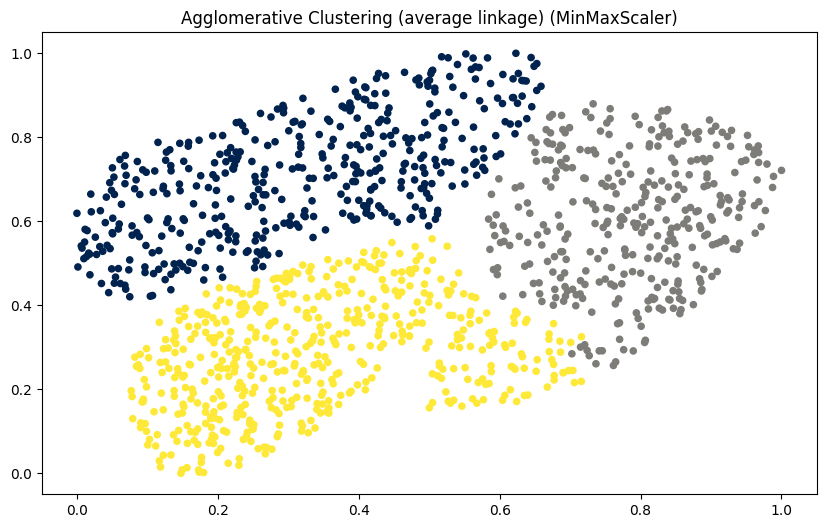

In [22]:
apply_model(agg, data_fe, 'Agglomerative Clustering (average linkage) (MinMaxScaler)')

Silhouette Score: 0.350
Davies-Bouldin Score: 0.873


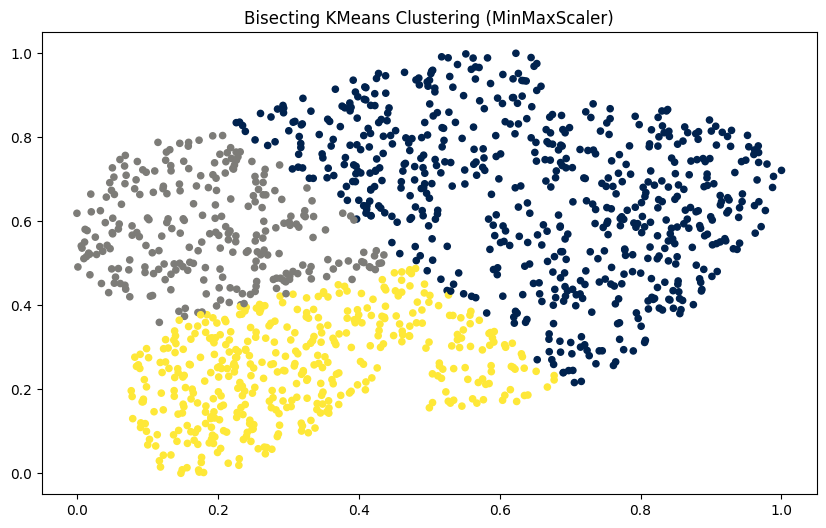

In [23]:
apply_model(bkmeans, data_fe, 'Bisecting KMeans Clustering (MinMaxScaler)')

### Final model selection

#### Best models (By score)

1. K-means
2. Agglomerative (average linkage)
3. Bisecting

#### Best feature engineering (By boost in score)

1. PCA
2. Standard scaler
3. MinMax scaler
4. RAW

#### The final selection and why?

I am going to select Agglomerative clustering with average linkage and PCA as the feature engineering technique!

We have to consider the fact that the scores we have used to measure the performance of the algorithm is not the most optimum. We choose Agglomerative over K-Means because it is more tolerant to both convex and concave shaped clusters while K-Means is not.

Also consider the fact that both the algorithms give pretty respectible scores.

In [24]:
## Save the clusters obtained from agglomerative clustering with average linkage with PCA

data_fe = PCA(n_components=2).fit_transform(data)
clusters = agg.fit_predict(data_fe)

np.savetxt('clusters.csv', clusters, delimiter=',', fmt='%d', header='Cluster', comments='')